## Observations and Insights 

In [1]:
# Dependencies and Setup; THIS WILL BE GREAT!!
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [2]:
mouse_metadata.head()
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset

# Display the data table for preview

Merged_Data_df = pd.merge(mouse_metadata, study_results, how='outer' )
Merged_Data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.

#By pulling the count by Mouse ID, we can Identify that there is duplicated mice ID's

mice_count = Merged_Data_df["Mouse ID"].value_counts()
mice_count.head()

g989    13
e584    10
x401    10
c832    10
g316    10
Name: Mouse ID, dtype: int64

In [5]:
#mice quantity is 249.

mice_quantity = len(mice_count)
mice_quantity

249

In [6]:
mice_count = mouse_metadata.loc[:,["Mouse ID"]]
mice_count_table = mice_count.count()
mice_count_table

pd.DataFrame({"The Mice Count is " : [mice_count_table]})

## MICE TOTAL COUNT IS 249

,The Mice Count is
0,Mouse ID 249 dtype: int64


In [7]:
Merged_Data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#mice_unique = Merged_Data_df.loc[:,['Mouse ID', 'Timepoint']].duplicated()
mice_unique = Merged_Data_df.loc[Merged_Data_df.duplicated(['Mouse ID',]),'Mouse ID'].unique()
#mice_unique_totals = mice_unique['Mouse ID'].duplicated()
len(mice_unique)

#Result Presentation
#pd.DataFrame({"Total Unique Mice is ": [mice_unique]})

## MICE TOTAL COUNT IS 249 Verified
##MICE UNIQUE COUNT IS 237 verified

237

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 

#

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [11]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Statistics_tumor = Merged_Data_df.groupby('Tumor Volume (mm3)')
Statistics_tumor = Merged_Data_df.groupby('Drug Regimen')
Statistics_tumor.head()

       # tumor_mean= Statistics_tumor['Tumor Volume (mm3)']
    
        

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [14]:
tumor_mean = Statistics_tumor['Tumor Volume (mm3)'].mean()
tumor_median = Statistics_tumor['Tumor Volume (mm3)'].median()
tumor_variance = Statistics_tumor['Tumor Volume (mm3)'].var()
tumor_std_dev = Statistics_tumor['Tumor Volume (mm3)'].std()
tumor_sem = Statistics_tumor['Tumor Volume (mm3)'].sem()


tumor_mean
tumor_median 
tumor_variance
tumor_std_dev
tumor_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [15]:
Summary_Statistics = pd.DataFrame({"Tumor Mean" : tumor_mean, "Tumor Median" : tumor_median, "Tumor Variance" : tumor_variance,
                                   "Tumor Standard Deviation" : tumor_std_dev, "Tumor SEM" : tumor_sem })

Summary_Statistics

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


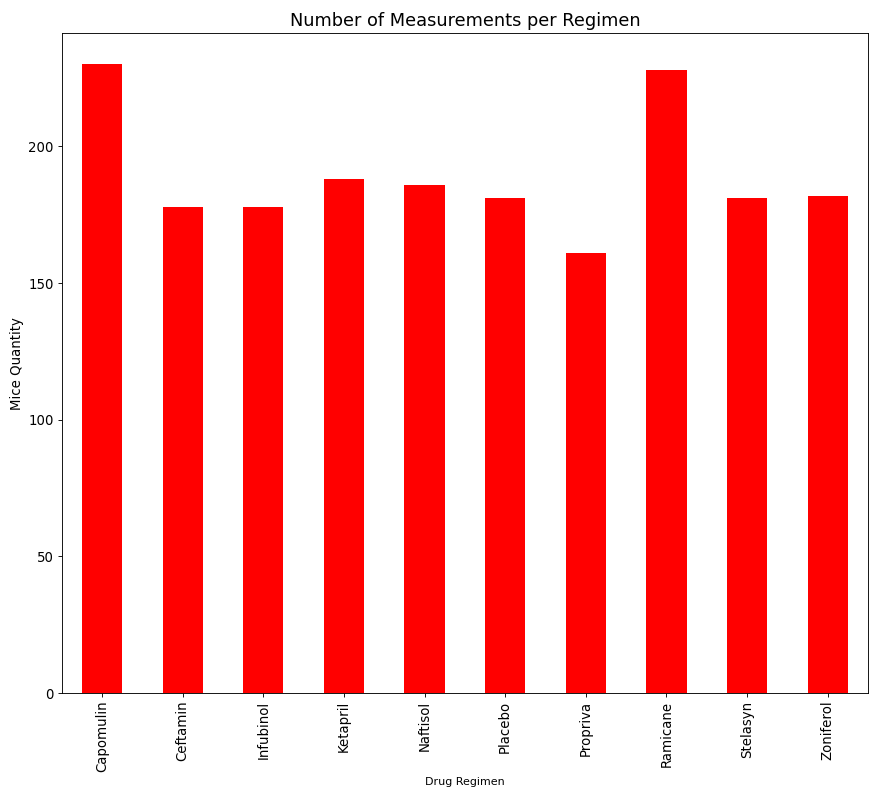

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

Count_per_regimen = Merged_Data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot00 = Count_per_regimen.plot.bar(figsize=(11,10), color='r',fontsize = 12)

plt.title("Number of Measurements per Regimen",fontsize = 16)
plt.ylabel("Mice Quantity", fontsize = 12)

plt.tight_layout()
plt.show()

In [17]:
#Creating a List for the second Plot (pyplot) for 'y' axis

Mice_qty = (Merged_Data_df.groupby(["Drug Regimen"]).count()["Mouse ID"])
Mice_qty

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<IPython.core.display.Javascript object>


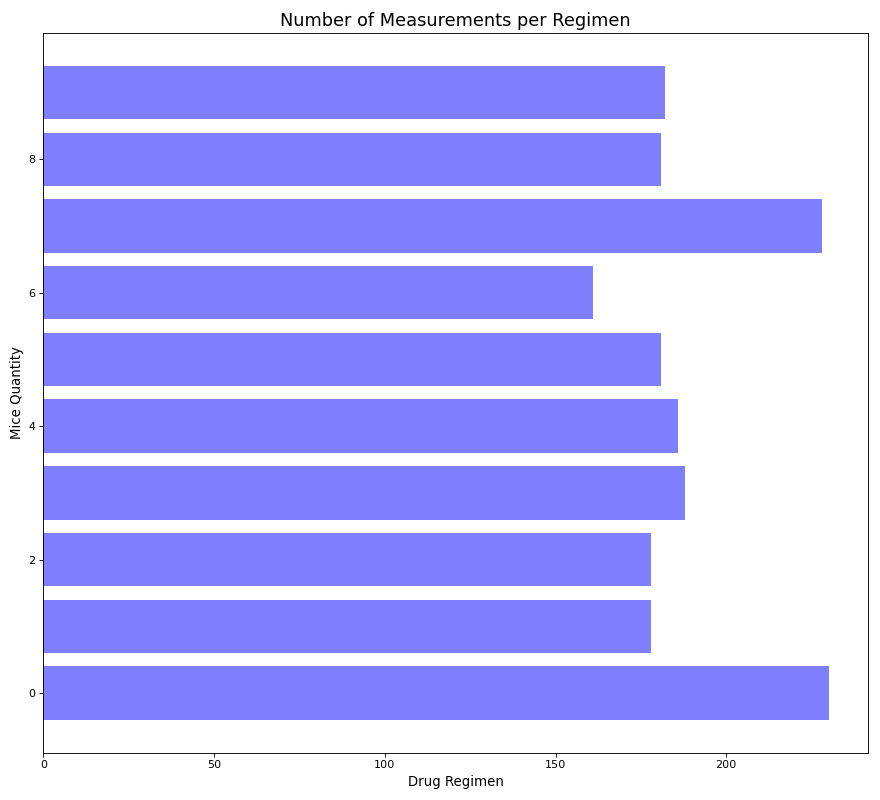

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using matplotlib.pyplot.barh to differentate with previous chart


Count_per_regimen2 = np.arange(len(Count_per_regimen))

fig1, ax1 =plt.subplots(figsize=(11,10))

plt.barh(Count_per_regimen2, Mice_qty, color='b', alpha=0.5, align='center')

plt.title("Number of Measurements per Regimen",fontsize = 16)
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("Mice Quantity", fontsize = 12)

plt.tight_layout()
plt.show()

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [22]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
